# MODELIZACIÓN PARA CLASIFICACIÓN

**IMPORTANTE**: Esta plantilla está diseñada para una visión de máximos utilizando el framework de The Ultimate Algo Machine. Si tienes problemas de memoria o rendimiento recuerda reducir el problema mediante:

* Muestreo
* Balanceo undersampling
* Reducir el número de algoritmos a testar
* Reducir el número de parámetros a testar
* Usar random search y especificar un n_iter adecuado

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import plot_precision_recall_curve
import scikitplot as skplt
from yellowbrick.classifier import discrimination_threshold

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\eloic\miniconda3\envs\mant_predictivo\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/eloic/Google Drive/EOI/TFM//01_MANT_PREDICTIVO'

Nombres de los ficheros de datos.

In [3]:
nombre_x = 'x_final.pickle'
nombre_y = 'y_final.pickle'

Cargar los datos.

In [4]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

## MODELIZAR

### Reservar el dataset de validacion

In [12]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

Modificar para dejar solo los algoritmos que se quieran testar.

Modificar los parámetros.

In [6]:
pipe = Pipeline([('algoritmo',RandomForestClassifier())])

grid = [
#         {'algoritmo': [LogisticRegression()],
#          'algoritmo__n_jobs': [-1],
#          'algoritmo__solver': ['saga'],
#          'algoritmo__penalty': ['elasticnet', 'l1', 'l2', 'none'],
#          'algoritmo__C': [0,0.25,0.5,0.75,1]}
        
        {'algoritmo': [RandomForestClassifier()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__max_depth': [5,10,15],
         'algoritmo__n_estimators': [50,100,200]}
        
#         {'algoritmo': [XGBClassifier()],
#          'algoritmo__n_jobs': [-1],
#          'algoritmo__verbosity': [0],#para que no salgan warnings
#          'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
#          'algoritmo__max_depth': [5,10,20],
#          'algoritmo__reg_alpha': [0,0.1,0.5,1],
#          'algoritmo__reg_lambda': [0.01,0.1,1],
#          'algoritmo__n_estimators': [100,500,1000]}
       ]

### Optimizar los hiper parámetros

Elegir si se quiere usar grid search o random search.

Comentar la opción que no se vaya a usar.

####  Con grid search

In [7]:
# grid_search = GridSearchCV(estimator= pipe, 
#                            param_grid = grid, 
#                            cv = 3, 
#                            scoring = 'roc_auc',
#                            verbose = 0,
#                            n_jobs = -1)

# modelo = grid_search.fit(train_x,train_y)

# pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

####  Con random search

In [8]:
random_search = RandomizedSearchCV(estimator = pipe,
                                   param_distributions = grid, 
                                   n_iter = 5, 
                                   cv = 3, 
                                   scoring = 'roc_auc', 
                                   verbose = 0,
                                   n_jobs = -1)

modelo = random_search.fit(train_x,train_y)

pd.DataFrame(random_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo__n_jobs,param_algoritmo__n_estimators,param_algoritmo__max_depth,param_algoritmo,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.38,0.06,0.05,0.00,-1,100,15,"RandomForestClassifier(max_depth=15, n_jobs=-1)","{'algoritmo__n_jobs': -1, 'algoritmo__n_estima...",0.79,0.68,0.81,0.76,0.06,1
1,0.24,0.01,0.04,0.01,-1,50,10,"RandomForestClassifier(max_depth=15, n_jobs=-1)","{'algoritmo__n_jobs': -1, 'algoritmo__n_estima...",0.81,0.69,0.77,0.75,0.05,2
3,0.39,0.04,0.07,0.01,-1,100,10,"RandomForestClassifier(max_depth=15, n_jobs=-1)","{'algoritmo__n_jobs': -1, 'algoritmo__n_estima...",0.82,0.65,0.78,0.75,0.07,3
4,0.70,0.13,0.08,0.00,-1,200,5,"RandomForestClassifier(max_depth=15, n_jobs=-1)","{'algoritmo__n_jobs': -1, 'algoritmo__n_estima...",0.84,0.65,0.75,0.75,0.08,4
2,0.20,0.02,0.03,0.00,-1,50,15,"RandomForestClassifier(max_depth=15, n_jobs=-1)","{'algoritmo__n_jobs': -1, 'algoritmo__n_estima...",0.82,0.69,0.73,0.75,0.06,5


## EVALUAR

### Predecir sobre validación

In [13]:
pred = modelo.best_estimator_.predict_proba(val_x)[:, 1]

### Evaluar sobre validación

In [14]:
roc_auc_score(val_y, pred)

0.8884154040404041

### Examinar el mejor modelo

In [15]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo', RandomForestClassifier(max_depth=15, n_jobs=-1))])

## REPORTING DEL MODELO

### Gain Chart

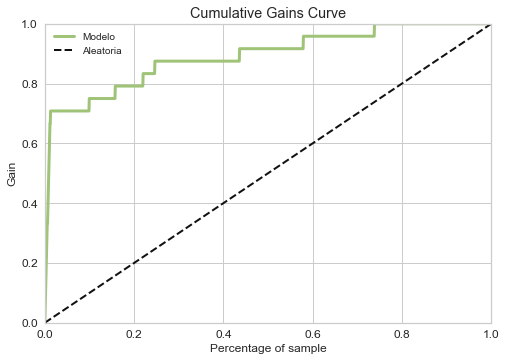

In [16]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
plt.legend(labels = ['Modelo','Aleatoria']);

### Lift Chart

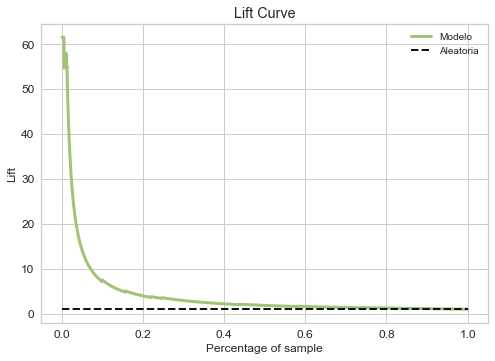

In [17]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
plt.legend(labels = ['Modelo','Aleatoria']);

### ROC Chart

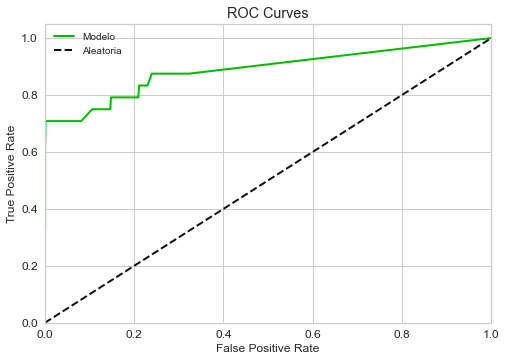

In [18]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
del ax.lines[1] 
del ax.lines[1]
plt.legend(labels = ['Modelo','Aleatoria']);